In [1]:
import os
import cv2
import math
import time
import librosa
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import torch
import warnings
warnings.filterwarnings("ignore")

In [2]:
class Config:
 
    DEBUG_MODE = True
    
    OUTPUT_DIR = './working/'
    DATA_ROOT = './Data'
    FS = 32000
    
    # Mel spectrogram parameters
    N_FFT = 1024
    HOP_LENGTH = 512
    N_MELS = 128
    FMIN = 50
    FMAX = 14000
    
    TARGET_DURATION = 5.0
    TARGET_SHAPE = (256, 256)  
    
    N_MAX = 50 if DEBUG_MODE else None  

config = Config()

In [3]:
print(f"Debug mode: {'ON' if config.DEBUG_MODE else 'OFF'}")
print(f"Max samples to process: {config.N_MAX if config.N_MAX is not None else 'ALL'}")

print("Loading taxonomy data...")
taxonomy_df = pd.read_csv(f'{config.DATA_ROOT}/taxonomy.csv')
species_class_map = dict(zip(taxonomy_df['primary_label'], taxonomy_df['class_name']))

print("Loading training metadata...")
train_df = pd.read_csv(f'{config.DATA_ROOT}/train.csv')

Debug mode: ON
Max samples to process: 50
Loading taxonomy data...
Loading training metadata...


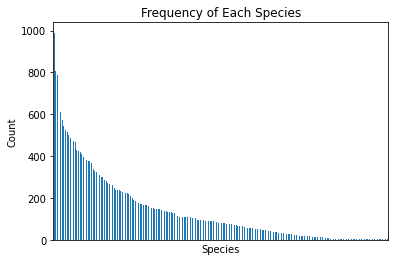

mean: 138.6601941747573
max: 990
min: 2
std: 169.17758332725384
median: 80.5
quantile_25: 19.0
quantile_50: 80.5
quantile_75: 182.75
sum: 28564


In [12]:
import matplotlib.pyplot as plt
value_counts = train_df['primary_label'].value_counts()

# 막대그래프 그리기
ax = value_counts.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Frequency of Each Species')
ax.set_xticks([])  # 또는 plt.xticks([])
plt.show()
stats = {
    'mean': value_counts.mean(),
    'max': value_counts.max(),
    'min': value_counts.min(),
    'std': value_counts.std(),
    #'var': value_counts.var(),
    'median': value_counts.median(),
    'quantile_25': value_counts.quantile(0.25),
    'quantile_50': value_counts.quantile(0.5),
    'quantile_75': value_counts.quantile(0.75),
    #'count': value_counts.count(),
    'sum': value_counts.sum()
}

# 결과 출력
for k, v in stats.items():
    print(f'{k}: {v}')

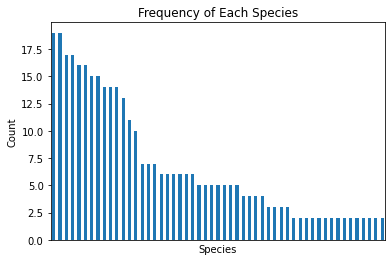

In [11]:
ax = value_counts[value_counts<=19].plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Frequency of Each Species')
ax.set_xticks([])  # 또는 plt.xticks([])
plt.show()

In [13]:
value_counts[value_counts<=19]

42007      19
piwtyr1    19
rutpuf1    17
715170     17
65349      16
65344      16
41970      15
shghum1    15
norscr1    14
sahpar1    14
67252      14
24322      13
turvul     11
135045     10
65547       7
787625      7
1462737     7
plctan1     6
555142      6
126247      6
65336       6
1564122     6
24272       6
548639      5
46010       5
1346504     5
963335      5
476538      5
714022      5
66893       5
134933      4
1192948     4
868458      4
523060      4
24292       3
65419       3
1194042     3
1462711     3
81930       2
67082       2
66578       2
66531       2
66016       2
21038       2
41778       2
21116       2
64862       2
528041      2
476537      2
47067       2
42113       2
42087       2
1139490     2
Name: primary_label, dtype: int64